## Question 2:

#### What’s the most popular fast food restaurant in the U.S? 
* Is there a correlation between price level and user rating total?

In [154]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [155]:
# Read our Data file with the pandas library
df = pd.read_csv("../fastfood_restaurant_review.csv")
df.head()

,name,country,latitude,longitude,Street Adress,price_level,rating,user_ratings_total
0,Sonic Drive-In,US,29.814697,-90.814742,"800 N Canal Blvd, Thibodaux, LA 70301",1.0,4.3,479.0
1,Taco Bell,US,35.803788,-83.580553,"206 Wears Valley Rd, Pigeon Forge, TN 37863",1.0,3.3,1029.0
2,Arby's,US,35.782339,-83.551408,"3652 Parkway, Pigeon Forge, TN 37863",1.0,3.9,1620.0
3,Steak 'n Shake,US,33.562738,-84.321143,"2118 Mt Zion Parkway, Morrow, GA 30260",1.0,3.4,5287.0
4,Wendy's,US,42.368823,-83.138251,"9768 Grand River Ave, Detroit, MI 48204",1.0,3.6,1560.0


In [156]:
#Count Rows and Columns in the DataFrame
r, c = df.shape
print(f'Number of rows: {r}')
print(f'Number of columns: {c}')

Number of rows: 7821
Number of columns: 8


In [157]:
# Standardize restaurant name
df['name']=df['name'].replace({'Chick-Fil-A':'Chick-fil-A'})

In [158]:
df1 = df.dropna()
df1.head()

,name,country,latitude,longitude,Street Adress,price_level,rating,user_ratings_total
0,Sonic Drive-In,US,29.814697,-90.814742,"800 N Canal Blvd, Thibodaux, LA 70301",1.0,4.3,479.0
1,Taco Bell,US,35.803788,-83.580553,"206 Wears Valley Rd, Pigeon Forge, TN 37863",1.0,3.3,1029.0
2,Arby's,US,35.782339,-83.551408,"3652 Parkway, Pigeon Forge, TN 37863",1.0,3.9,1620.0
3,Steak 'n Shake,US,33.562738,-84.321143,"2118 Mt Zion Parkway, Morrow, GA 30260",1.0,3.4,5287.0
4,Wendy's,US,42.368823,-83.138251,"9768 Grand River Ave, Detroit, MI 48204",1.0,3.6,1560.0


In [159]:
#Count Rows and Columns in the DataFrame
r, c = df1.shape
print(f'Number of rows: {r}')
print(f'Number of columns: {c}')

Number of rows: 7821
Number of columns: 8


### What’s the most popular fast food restaurant in the U.S?

The *rating* of each restaurant is multiplied by the number of *user_ratings_total* to create the *level of popularity*

In [160]:
# Calculate the level of popularity for each restaurant
df1['level_of_popularity'] = df1['rating'] * df1['user_ratings_total']
columns = ["name","level_of_popularity"]
master_table = df1[columns]
df2 = master_table.groupby(['name']).sum()
df2.sort_values(['level_of_popularity'], ascending=False).head(20)

,level_of_popularity
name,
McDonald's,5866282.0
Taco Bell,2700748.7
Burger King,1697753.1
Arby's,1648261.8
Wendy's,1642936.5
Chick-fil-A,1439481.1
Subway,1325979.7
Jack in the Box,892636.7
In-N-Out Burger,767863.8


<AxesSubplot:title={'center':'Top 20 Most Populart Restaurants in the US (Per Million User Points)'}, ylabel='Restaurant'>

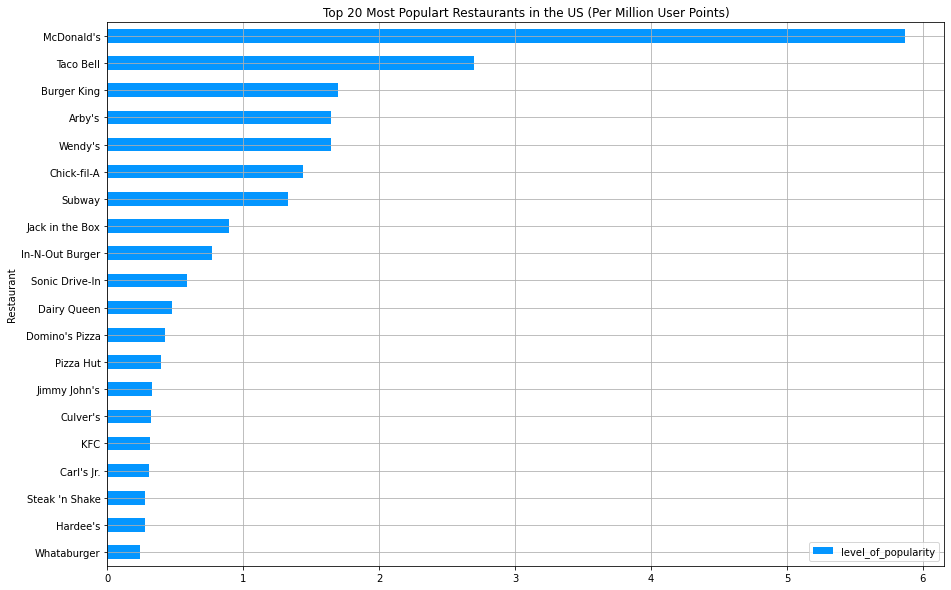

In [161]:
# Create a bar chart by restaurant name
columns = ["name","level_of_popularity"]
master_table = df1[columns]
df2 = master_table.groupby(['name']).sum()
df2['level_of_popularity'] = df2['level_of_popularity']/1000000
df2 = df2.sort_values(['level_of_popularity'], ascending=False).head(20)
df2 = df2.sort_values(['level_of_popularity'], ascending=True)


df2.plot(kind='barh', xlabel = 'Restaurant', ylabel = 'Level of Popularity', title='Top 20 Most Populart Restaurants in the US (Per Million User Points)', figsize= (15,10), color='#0496FF', grid = True)


### Is there a correlation between price level and user rating total?

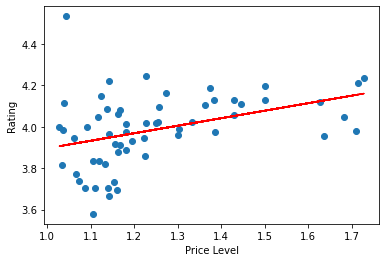

The r-squared is: 0.1538
The correlation coefficient is: 0.3922


In [172]:
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
from scipy import stats

# Create a bar chart by restaurant name
columns = ["name","price_level", "rating"]
master_table = df1[columns]
df2 = master_table.groupby(['name']).mean()

#df2.plot(kind='scatter', x ="price_level", y="rating", figsize= (15,10), color='#0496FF', grid = True)

# correlation between column 1 and column2
correlation_index = df2['price_level'].corr(df2['rating']) 



x_values = df2['price_level']
y_values = df2['rating']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Price Level')
plt.ylabel('Rating')
plt.show()
print(f"The r-squared is: {rvalue**2:.4f}")
print(f'The correlation coefficient is: {correlation_index:.4f}')